Brownian Motion and Geometric Brownian Motion

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

T = 1            
n = 250          
M = 10     

# stock price      
S0 = 100 

# drift
mu = 0.05

# Volatility
sigma = 0.2      
 

dt = T / n                       
t = np.linspace(0, T, n+1)      

 
# the brownian path
 
W = np.zeros((M, n+1))

for m in range(M):
    Z = np.random.normal(0, 1, n)      
    dW = np.sqrt(dt) * Z                
    W[m,1:] = np.cumsum(dW)             

 
# Simulate GBM paths S
 
S = np.zeros((M, n+1))
for m in range(M):
    S[m] = S0 * np.exp((mu - 0.5*sigma**2)*t + sigma * W[m])

 


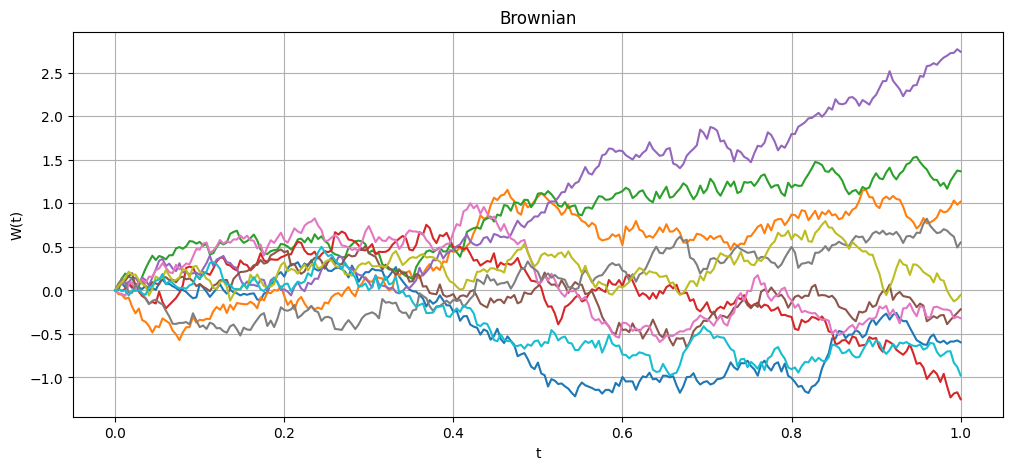

In [3]:
# Plot Brownian motion
 
plt.figure(figsize=(12,5))
for m in range(M):
    plt.plot(t, W[m])
plt.title("Brownian")
plt.xlabel("t")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()



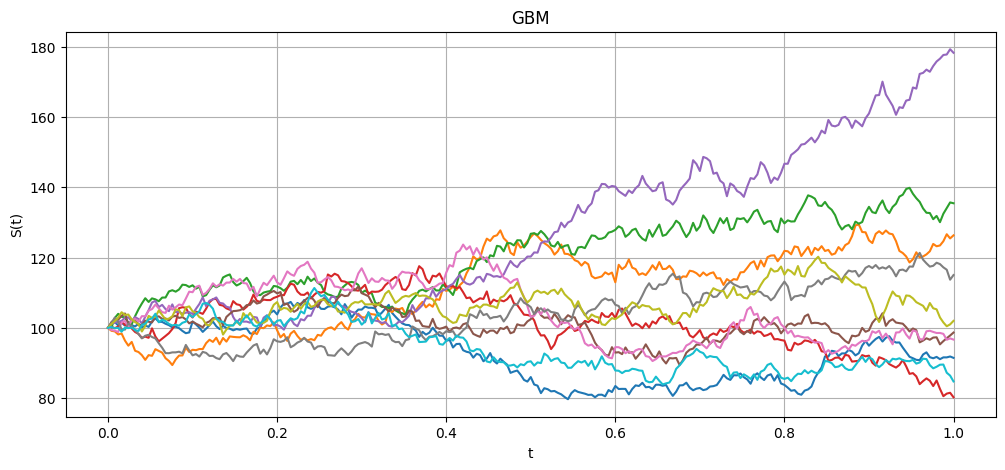

In [ ]:

# And a  GBM plot
 
plt.figure(figsize=(12,5))
for m in range(M):
    plt.plot(t, S[m])
plt.title("GBM")
plt.xlabel("t")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()

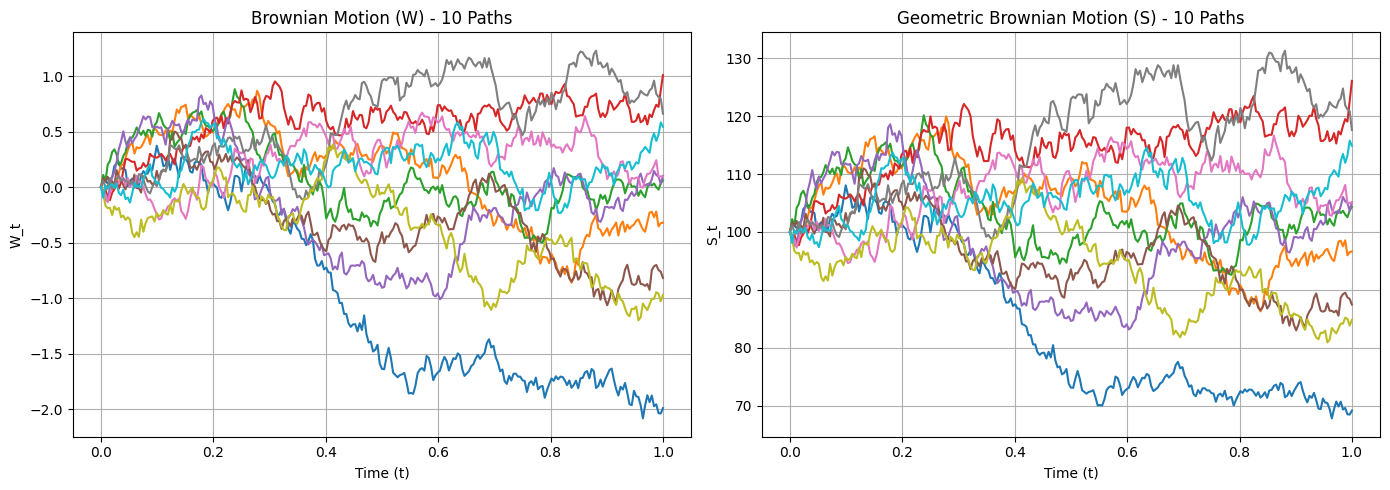

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_trajectories(T, n, M, S0, mu, sigma):
    """
    Simulates M trajectories of Brownian Motion (W) and 
    Geometric Brownian Motion (S).
    """
    
    dt = T / n
    t = np.linspace(0, T, n + 1) 
    
    # Brownian Motion (W)
    Z = np.random.standard_normal((M, n))
    dW = Z * np.sqrt(dt)
    
    W = np.zeros((M, n + 1))
    
    # Create random walk path with cumsum
    W[:, 1:] = np.cumsum(dW, axis=1)
    
    # Geometric Brownian Motion
    # St = S0 * exp((mu - 0.5 * sigma^2)*t + sigma*Wt)
    # t is (n+1,), W is (M, n+1). Broadcasting works automatically.

    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    
    S = S0 * np.exp(drift + diffusion)
    
    return t, W, S

# Params Setup

T = 1.0      # Time horizon (ie. 1 year)
n = 252      # Number of steps (i.e, daily trading steps)
M = 10       # Number of trajectories  
S0 = 100     # Initial stock price
mu = 0.05    # Drift
sigma = 0.2  # Volatility

# Run Simulation
time_grid, W_paths, S_paths = simulate_trajectories(T, n, M, S0, mu, sigma)

# Plotting 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Brownian Motion W
for i in range(M):
    ax1.plot(time_grid, W_paths[i])
ax1.set_title(f'Brownian Motion (W) - {M} Paths')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('W_t')
ax1.grid(True)

# Plot Geometric Brownian Motion S
for i in range(M):
    ax2.plot(time_grid, S_paths[i])
ax2.set_title(f'Geometric Brownian Motion (S) - {M} Paths')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('S_t')
ax2.grid(True)

plt.tight_layout()
plt.show()